My notes about [this article](https://realpython.com/python-ai-neural-network/)

# Neural Networks

Vectors, layers, linear regression

The data is stored as *vectors*, and with Python you store these vectors in *arrays*. 

trial and error

With neural networks, you start with some *random weights and bias vectors*, make a prediction, compare it to the desired output, and adjust the vectors to predict more accurately the next time.

The *dot product* of two vectors tells you how similar they are in terms of direction and is scaled by the magnitude of the two vectors.

*Regression* is used when you need to estimate the relationship between a dependent variable and two or more independent variables.

By modeling the relationship between the variables as *linear*, you can express the dependent variable as a *weighted sum* of the independent variables. So, each independent variable will be multiplied by a vector called *weight*. Besides the weights and the independent variables, you also add another vector: the *bias*. It sets the result when all the other independent variables are equal to zero.

As a real-world example:
price = (weights_area * area) + (weights_age * age) + bias

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


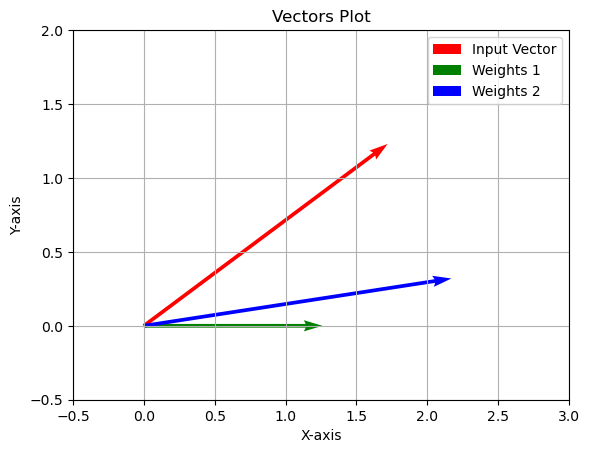

In [3]:
import matplotlib.pyplot as plt

input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

fig, ax = plt.subplots()
print(fig) # Figure(640x480)
print(ax) # Axes(0.125,0.11;0.775x0.77)

ax.quiver(0, 0, input_vector[0], input_vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Input Vector')
ax.quiver(0, 0, weights_1[0], weights_1[1], angles='xy', scale_units='xy', scale=1, color='g', label='Weights 1')
ax.quiver(0, 0, weights_2[0], weights_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Weights 2')
"""
Plot a 2D field of arrows.
quiver([X, Y], U, V, [C], **kwargs)
X, Y define the arrow locations, U, V define the arrow directions, C optionally sets the color.
angles: {'uv', 'xy'} or array-like, default: 'uv'
scale_units: {'width', 'height', 'dots', 'inches', 'x', 'y', 'xy'}, optional
scale: float, optional
units: {'width', 'height', 'dots', 'inches', 'x', 'y', 'xy'}, default: 'width'
"""

ax.set_xlim(-0.5, 3)
ax.set_ylim(-0.5, 2)
# left, right

ax.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vectors Plot')
plt.legend()

plt.show()

In [4]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

print(f"The dot product of input and weights 1: {input_vector[0] * weights_1[0] + input_vector[1] * weights_1[1]}")

The dot product of input and weights 1: 2.1672


In [5]:
import numpy as np

print(f"The dot product  of input and weights 1: {np.dot(input_vector, weights_1)}")
print(f"The dot product  of input and weights 2: {np.dot(input_vector, weights_2)}")

The dot product  of input and weights 1: 2.1672
The dot product  of input and weights 2: 4.1259999999999994


### input_vector is more similar to weights_2

In next tutorial, you’ll train a model to make predictions that have only two possible outcomes. The output result can be either 0 or 1. This is a classification problem, a subset of supervised learning problems in which you have a dataset with the inputs and the known targets.

nonlinear functions = activation functions

sigmoid activation function = Sigmoid f. limits the output to a range between 0 and 1.

<img src="https://realpython.com/cdn-cgi/image/width=1157,format=auto/https://files.realpython.com/media/sigmoid_function.f966c820f8c3.png" width="200">

The e is a mathematical constant called Euler’s number
np.exp(x) = eˣ

Since the function limits the output to a range of 0 to 1, you’ll use it to predict probabilities. If the output is greater than 0.5, then you’ll say the prediction is 1. If it’s below 0.5, then you’ll say the prediction is 0.

In [8]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


The raw prediction result is 0.79, which is higher than 0.5, so the output is 1. The network made a correct prediction.

In [10]:
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


The correct result for this input is 0. This time, the network made a wrong prediction.

You first assess the error and then adjust the weights accordingly. To adjust the weights, you’ll use the *gradient descent and backpropagation algorithms*. Gradient descent is applied to find the direction and the rate to update the parameters.

The function used to measure the error is called the *cost function, or loss function*. You’ll use the *mean squared error (MSE)* as your cost function. Compute the difference between the prediction and the target. Multiply the result by itself.

In [12]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


The goal is to change the weights and bias variables so you can reduce the error. To understand how this works, you’ll change only the weights variable and leave the bias fixed for now.

You compute the MSE by doing error = np.square(prediction - target). If you treat (prediction - target) as a single variable x, then you have error = np.square(x), which is a quadratic function.

<img src="https://realpython.com/cdn-cgi/image/width=1157,format=auto/https://files.realpython.com/media/quatratic_function.002729dea332.png" width="400">

To know which direction you should go to reduce the error, you’ll use the *derivative*. 

Another word for the derivative is *gradient*. *Gradient descent* is the name of the algorithm used to find the direction and the rate to update the network parameters.

The derivative of np.square(x) is 2 * x

In [14]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [1.7420383]


The result is 1.74, a positive number, so you need to decrease the weights.

In [16]:
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01496248]; Error: [0.00022388]


To define a fraction for updating the weights, you use the *alpha* parameter, also called the *learning rate*. If you decrease the learning rate, then the increments are smaller. If you increase it, then the steps are higher.

Traditional default learning rate values are *0.1, 0.01, and 0.001*.

### Applying the Chain Rule

With the chain rule, you take the partial derivatives of each function, evaluate them, and multiply all the partial derivatives to get the derivative you want.

You can start updating the weights. You want to know how to change the weights to decrease the error. You need to compute the derivative of the error with respect to weights. Since the error is computed by combining different functions, you need to take the partial derivatives of these functions.

<img src="https://realpython.com/cdn-cgi/image/width=1500,format=auto/https://files.realpython.com/media/partial_derivative_weights_2.c792633559c3.png" width="400">

derror_dweights = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
)

To calculate the derivative, you multiply all the partial derivatives that follow the path. This reverse path is called a backward pass. This algorithm to update the neural network parameters is called backpropagation.

### Backpropagation

You want to take the derivative of the error function with respect to the bias, derror_dbias. Then you’ll keep going backward, taking the partial derivatives until you find the bias variable.

You first need to take the partial derivative of the error with respect to the prediction. That’s the derror_dprediction.

Then take the derivative of the prediction with respect to the previous layer, dprediction_dlayer1. The prediction is the result of the sigmoid function. You can take the derivative of the sigmoid function by multiplying sigmoid(x) and 1 - sigmoid(x). You then take this partial derivative and continue going backward.

Now you’ll take the derivative of layer_1 with respect to the bias. The bias variable is an independent variable, so the result after applying the power rule is 1.

<img src="https://realpython.com/cdn-cgi/image/width=1500,format=auto/https://files.realpython.com/media/partial_derivative_bias_2.177c16a60b9d.png" width="400">

In [18]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

## Neural Network Class

In [20]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            # Calculate the partial derivatives and return the derivatives for the bias and the weights.
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            # To observe how the error changes every 100 iterations.
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [21]:
# If you want to make a prediction

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.14986205302168637

### Training the Network

Stochastic gradient descent is a technique in which, at every iteration, the model makes a prediction based on a randomly selected piece of training data, calculates the error, and updates the parameters.

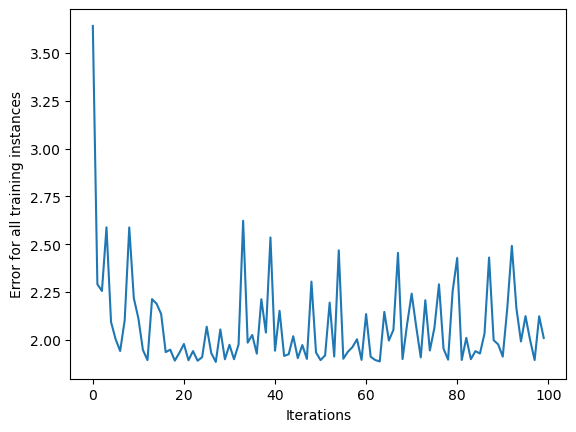

In [23]:
import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()